<a href="https://colab.research.google.com/github/Anna-bashkatova/ProgramAnalitik/blob/main/%D0%9B%D0%B0%D0%B1_7_%D0%91%D0%B0%D1%88%D0%BA%D0%B0%D1%82%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример из Лабораторной работы

In [1]:
from google.colab import files
unploaded = files.upload()

Saving dataset7.csv to dataset7.csv


In [2]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

series=read_csv('dataset7.csv', header=0,index_col=0)
print(series.head())

values = series.values
values = values.reshape((len(values),1))

scaler = MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(values)
print('Min:%f, Max:%f' % (scaler.data_min_, scaler.data_max_))

normalized=scaler.transform(values)
for i in range(5):
  print(normalized[i])

inversed=scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
Min:0.000000, Max:26.300000
[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


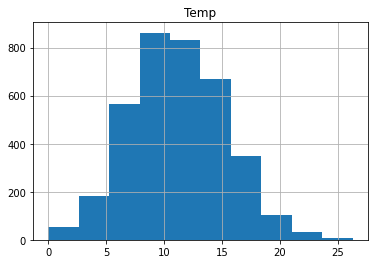

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset7.csv',header=0,index_col=0)
series.hist()
pyplot.show()

In [4]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt

series=read_csv('dataset7.csv', header=0,index_col=0)
print(series.head())
values=series.values
values=values.reshape((len(values),1))

scaler=StandardScaler()
scaler=scaler.fit(values)
print('Mean: %f, StandardDeviation:%f' % (scaler.mean_, sqrt(scaler.var_)))

normalized=scaler.transform(values)
for i in range(5):
  print(normalized[i])

inversed=scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
Mean: 11.177753, StandardDeviation:4.071279
[2.33888328]
[1.65113873]
[1.87219948]
[0.84058266]
[1.13533032]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


# Задание 1

In [5]:
import requests 
import pandas as pd
from pandas import read_html

url='http://pogoda-service.ru/archive_gsod_res.php?country=IS&station=401800&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
req = requests.get(url)
data = pd.read_html(req.text)
df = data[0]

In [6]:
df.head()

,ÐÐ°ÑÐ°,ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ,Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°,ÐÑÐ°Ð´ÐºÐ¸,Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,28.7,9.1,18.3,NaN,2,0.0,16.5
1,02.12.2010,28.5,10.0,18.2,NaN,1,0.0,17.1
2,03.12.2010,30.3,9.0,19.2,NaN,2,0.0,16.8
3,04.12.2010,31.4,10.0,18.9,NaN,2,0.0,16.7
4,05.12.2010,26.2,8.7,18.6,NaN,2,0.0,17.3


In [7]:
df.columns=['Дата','Максимальная температура', 'Минимальная температура', 'Средняя температура', 'Атмосферное давление', 'Скорость ветра', 'Осадки', 'Эффективная температура']

In [8]:
df.drop(['Максимальная температура','Минимальная температура','Атмосферное давление', 'Скорость ветра','Осадки','Эффективная температура'], axis = 1, inplace=True)

In [9]:
df['Дата'] = df['Дата'].astype('datetime64')

In [10]:
df = df.set_index('Дата')

In [11]:
df.head()

,Средняя температура
Дата,
2010-01-12,18.3
2010-02-12,18.2
2010-03-12,19.2
2010-04-12,18.9
2010-05-12,18.6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2010-01-12 to 2013-08-28
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Средняя температура  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [13]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

print(df.head())

values = df.values
values = values.reshape((len(values),1))

scaler = MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(values)
print('Min:%f, Max:%f' % (scaler.data_min_, scaler.data_max_))

normalized=scaler.transform(values)
for i in range(5):
  print(normalized[i])

inversed=scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

            Средняя температура
Дата                           
2010-01-12                 18.3
2010-02-12                 18.2
2010-03-12                 19.2
2010-04-12                 18.9
2010-05-12                 18.6
Min:8.100000, Max:31.800000
[0.43037975]
[0.42616034]
[0.46835443]
[0.4556962]
[0.44303797]
[18.3]
[18.2]
[19.2]
[18.9]
[18.6]


# Задание 2

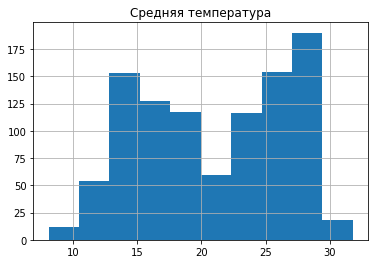

In [19]:
from pandas import read_csv
from matplotlib import pyplot
series = df
series.hist()
pyplot.show()

In [14]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt

#series=read_csv('dataset7.csv', header=0,index_col=0)
print(df.head())
values=df.values
values=values.reshape((len(values),1))

scaler=StandardScaler()
scaler=scaler.fit(values)
print('Mean: %f, StandardDeviation:%f' % (scaler.mean_, sqrt(scaler.var_)))

normalized=scaler.transform(values)
for i in range(5):
  print(normalized[i])

inversed=scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

            Средняя температура
Дата                           
2010-01-12                 18.3
2010-02-12                 18.2
2010-03-12                 19.2
2010-04-12                 18.9
2010-05-12                 18.6
Mean: 21.033900, StandardDeviation:5.699804
[-0.47964811]
[-0.49719257]
[-0.32174793]
[-0.37438132]
[-0.42701472]
[18.3]
[18.2]
[19.2]
[18.9]
[18.6]


# Таблица

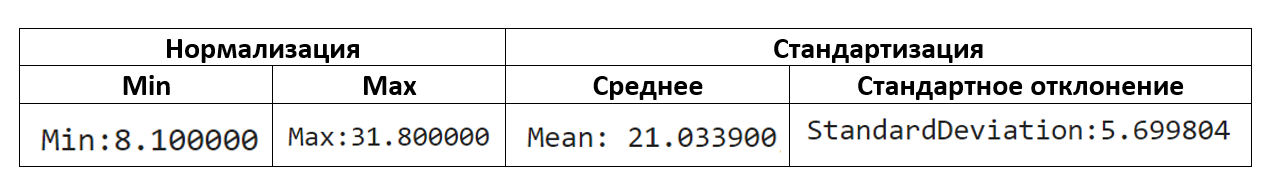